# **CSET419- Introduction to Generative AI**



Lab – 1

Implement a Simple Generative Algorithm for Data Generation

1.Select any domain for data generation (example: image data generation).

In [1]:
!pip install -q diffusers transformers accelerate safetensors

In [2]:
from huggingface_hub import login
login()

2.Choose any pre-trained generative model (example: Stable Diffusion / any diffusion model).

In [3]:
import torch
from diffusers import StableDiffusionPipeline

model_id = "runwayml/stable-diffusion-v1-5"

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16
).to("cuda")

Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split

In [ ]:
dog_breeds = [
    "Bernese Mountain Dog",
    "Saint Bernard",
    "Newfoundland",
    "Cane Corso",
    "Greyhound",
    "Whippet","Chow Chow",
    "Shiba Inu",
    "Basenji"
    "Bloodhound",
    "Basset Hound",

]

output_dir = "10_dog_dataset"
images_per_breed = 10
num_steps = 30
guidance = 7.5

os.makedirs(output_dir, exist_ok=True)
for breed in dog_breeds:
    breed_dir = os.path.join(output_dir, breed.replace(" ", "_"))
    os.makedirs(breed_dir, exist_ok=True)

    for i in range(images_per_breed):
        prompt = (
            f"a high quality photo of a {breed}, "
            f"ultra realistic, cinematic lighting, 4k, sharp focus"
        )

        image = pipe(
            prompt,
            num_inference_steps=num_steps,
            guidance_scale=guidance
        ).images[0]

        filename = f"{breed.replace(' ', '_')}_{i}.png"
        image_path = os.path.join(breed_dir, filename)
        image.save(image_path)

        print(f"Saved: {image_path}")

print("Dataset generation complete.")

  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Bernese_Mountain_Dog/Bernese_Mountain_Dog_0.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Bernese_Mountain_Dog/Bernese_Mountain_Dog_1.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Bernese_Mountain_Dog/Bernese_Mountain_Dog_2.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Bernese_Mountain_Dog/Bernese_Mountain_Dog_3.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Bernese_Mountain_Dog/Bernese_Mountain_Dog_4.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Bernese_Mountain_Dog/Bernese_Mountain_Dog_5.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Bernese_Mountain_Dog/Bernese_Mountain_Dog_6.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Bernese_Mountain_Dog/Bernese_Mountain_Dog_7.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Bernese_Mountain_Dog/Bernese_Mountain_Dog_8.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Bernese_Mountain_Dog/Bernese_Mountain_Dog_9.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Saint_Bernard/Saint_Bernard_0.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Saint_Bernard/Saint_Bernard_1.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Saint_Bernard/Saint_Bernard_2.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Saint_Bernard/Saint_Bernard_3.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Saint_Bernard/Saint_Bernard_4.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Saint_Bernard/Saint_Bernard_5.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Saint_Bernard/Saint_Bernard_6.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Saint_Bernard/Saint_Bernard_7.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Saint_Bernard/Saint_Bernard_8.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Saint_Bernard/Saint_Bernard_9.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Newfoundland/Newfoundland_0.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Newfoundland/Newfoundland_1.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Newfoundland/Newfoundland_2.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Newfoundland/Newfoundland_3.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Newfoundland/Newfoundland_4.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Newfoundland/Newfoundland_5.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Newfoundland/Newfoundland_6.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Newfoundland/Newfoundland_7.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Newfoundland/Newfoundland_8.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Newfoundland/Newfoundland_9.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Cane_Corso/Cane_Corso_0.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Cane_Corso/Cane_Corso_1.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Cane_Corso/Cane_Corso_2.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Cane_Corso/Cane_Corso_3.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Cane_Corso/Cane_Corso_4.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Cane_Corso/Cane_Corso_5.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Cane_Corso/Cane_Corso_6.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Cane_Corso/Cane_Corso_7.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Cane_Corso/Cane_Corso_8.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Cane_Corso/Cane_Corso_9.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Greyhound/Greyhound_0.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Greyhound/Greyhound_1.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Greyhound/Greyhound_2.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Greyhound/Greyhound_3.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Greyhound/Greyhound_4.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Greyhound/Greyhound_5.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Greyhound/Greyhound_6.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Greyhound/Greyhound_7.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Greyhound/Greyhound_8.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Greyhound/Greyhound_9.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Whippet/Whippet_0.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Whippet/Whippet_1.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Whippet/Whippet_2.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Whippet/Whippet_3.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Whippet/Whippet_4.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Whippet/Whippet_5.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Whippet/Whippet_6.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Whippet/Whippet_7.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Whippet/Whippet_8.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Whippet/Whippet_9.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Chow_Chow/Chow_Chow_0.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Chow_Chow/Chow_Chow_1.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Chow_Chow/Chow_Chow_2.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Chow_Chow/Chow_Chow_3.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Chow_Chow/Chow_Chow_4.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Chow_Chow/Chow_Chow_5.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Chow_Chow/Chow_Chow_6.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Chow_Chow/Chow_Chow_7.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Chow_Chow/Chow_Chow_8.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Chow_Chow/Chow_Chow_9.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Shiba_Inu/Shiba_Inu_0.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Shiba_Inu/Shiba_Inu_1.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Shiba_Inu/Shiba_Inu_2.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Shiba_Inu/Shiba_Inu_3.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Shiba_Inu/Shiba_Inu_4.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Shiba_Inu/Shiba_Inu_5.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Shiba_Inu/Shiba_Inu_6.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Shiba_Inu/Shiba_Inu_7.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Shiba_Inu/Shiba_Inu_8.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Shiba_Inu/Shiba_Inu_9.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/BasenjiBloodhound/BasenjiBloodhound_0.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/BasenjiBloodhound/BasenjiBloodhound_1.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/BasenjiBloodhound/BasenjiBloodhound_2.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/BasenjiBloodhound/BasenjiBloodhound_3.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/BasenjiBloodhound/BasenjiBloodhound_4.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/BasenjiBloodhound/BasenjiBloodhound_5.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/BasenjiBloodhound/BasenjiBloodhound_6.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/BasenjiBloodhound/BasenjiBloodhound_7.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/BasenjiBloodhound/BasenjiBloodhound_8.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/BasenjiBloodhound/BasenjiBloodhound_9.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Basset_Hound/Basset_Hound_0.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Basset_Hound/Basset_Hound_1.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Basset_Hound/Basset_Hound_2.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Basset_Hound/Basset_Hound_3.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Basset_Hound/Basset_Hound_4.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Basset_Hound/Basset_Hound_5.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Basset_Hound/Basset_Hound_6.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Basset_Hound/Basset_Hound_7.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Basset_Hound/Basset_Hound_8.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 10_dog_dataset/Basset_Hound/Basset_Hound_9.png
Dataset generation complete.


3.Generate synthetic data using the model.(for Testing Phase)

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

dataset_dir = "10_dog_dataset"

full_dataset = datasets.ImageFolder(
    root=dataset_dir,
    transform=transform
)

num_classes = len(full_dataset.classes)
print("Classes:", num_classes)

train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size

train_dataset, val_dataset = random_split(
    full_dataset, [train_size, val_size]
)

batch_size = 16


Classes: 10


4.Provide input prompts (at least 10). also take 10 images per breed and save it

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/10] Loss: 1.9699 Val Acc: 50.00%
Epoch [2/10] Loss: 0.7822 Val Acc: 80.00%
Epoch [3/10] Loss: 0.3425 Val Acc: 95.00%
Epoch [4/10] Loss: 0.1896 Val Acc: 100.00%
Epoch [5/10] Loss: 0.0997 Val Acc: 100.00%
Epoch [6/10] Loss: 0.0654 Val Acc: 95.00%
Epoch [7/10] Loss: 0.0482 Val Acc: 100.00%
Epoch [8/10] Loss: 0.0356 Val Acc: 100.00%
Epoch [9/10] Loss: 0.0327 Val Acc: 100.00%
Epoch [10/10] Loss: 0.0299 Val Acc: 100.00%


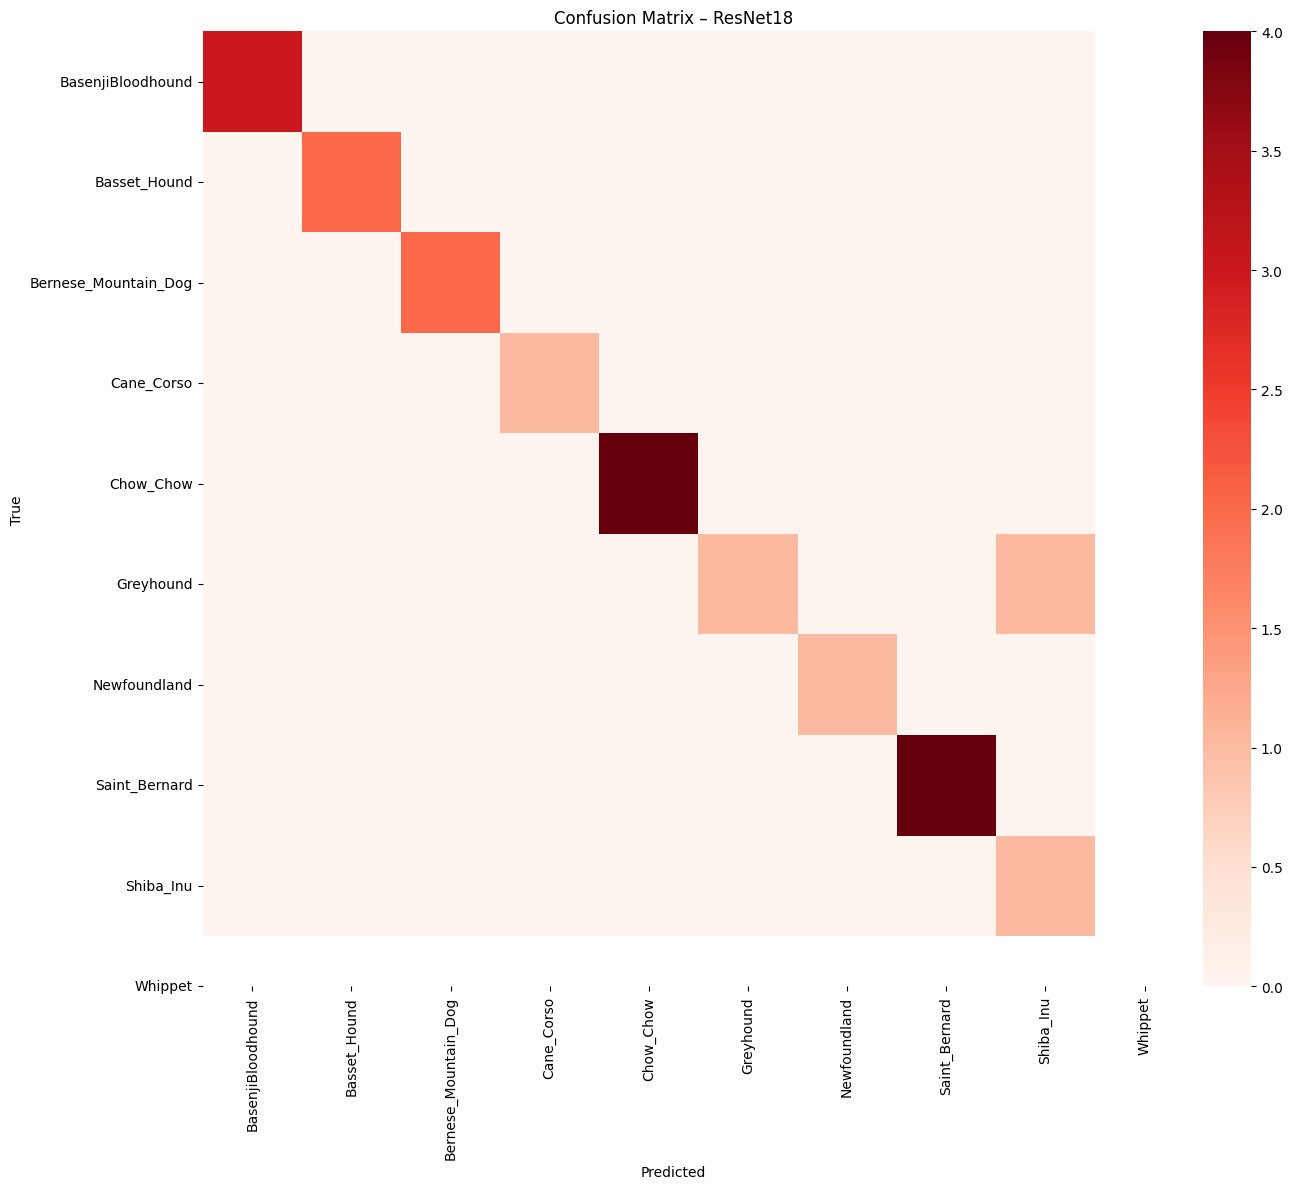

In [ ]:
train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True
)

val_loader = DataLoader(
    val_dataset,
    batch_size=batch_size,
    shuffle=False
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.resnet18(pretrained=True)

# Replace final layer
model.fc = nn.Linear(model.fc.in_features, num_classes)

model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

epochs = 10

for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)

    # Validation
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, preds = torch.max(outputs, 1)

            total += labels.size(0)
            correct += (preds == labels).sum().item()

    val_acc = 100 * correct / total

    print(
        f"Epoch [{epoch+1}/{epochs}] "
        f"Loss: {avg_loss:.4f} "
        f"Val Acc: {val_acc:.2f}%"
    )

torch.save(model.state_dict(), "resnet18_10_dog_breeds.pth")

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

model.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(14, 12))
sns.heatmap(
    cm,
    xticklabels=full_dataset.classes,
    yticklabels=full_dataset.classes,
    cmap="Reds",
    cbar=True
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix – ResNet18")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()